# Importing necessary libraries

In [1]:


import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import rc_context, rcParams
from sklearn.model_selection import train_test_split


# Importing The Data

In [2]:
df = pd.read_csv("/Users/sahreenhaider/Downloads/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

In [4]:
df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [5]:
df.describe()

,YearStart,YearEnd,Data_Value_Unit,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
count,53392.000000,53392.000000,0.0,48346.000000,48346.000000,48346.000000,48346.000000,48346.00000,53392.000000
mean,2013.281465,2013.281465,NaN,31.156681,31.156681,26.892227,35.989997,3889.19286,30.282215
std,1.693300,1.693300,NaN,10.247033,10.247033,10.038584,11.205813,19829.42129,16.821318
min,2011.000000,2011.000000,NaN,0.900000,0.900000,0.300000,3.000000,50.00000,1.000000
25%,2012.000000,2012.000000,NaN,24.100000,24.100000,20.000000,28.200000,566.00000,17.000000
50%,2013.000000,2013.000000,NaN,30.700000,30.700000,26.450000,35.600000,1209.00000,30.000000
75%,2015.000000,2015.000000,NaN,37.000000,37.000000,32.900000,42.200000,2519.00000,44.000000
max,2016.000000,2016.000000,NaN,77.600000,77.600000,69.500000,87.700000,476876.00000,78.000000


In [6]:
wrangled = df[df['StratificationID1'] == 'OVERALL'][['LocationDesc','Data_Value', 'Question', "YearStart" ]]
question = wrangled[wrangled['Question'] == 'Percent of adults who engage in no leisure-time physical activity'][['LocationDesc','Data_Value', 'Question', "YearStart" ]]
x_all = question[question['YearStart'] == 2014][['LocationDesc','Data_Value' ]]
x = question[question['YearStart'] == 2014][['Data_Value' ]].values

In [7]:

wrangled_df = df[df['StratificationID1'] == 'OVERALL'][['LocationDesc','Data_Value', 'Question', "YearStart" ]]
year = wrangled_df[wrangled_df['Question'] == 'Percent of adults aged 18 years and older who have obesity'][['LocationDesc','Data_Value', 'Question', "YearStart" ]]
y_all = year[year['YearStart'] == 2014][['LocationDesc','Data_Value' ]]
y = year[year['YearStart'] == 2014][['Data_Value' ]].values

In [8]:
x = x.reshape(-1, 1)

In [9]:
y = y.reshape(-1, 1)

# Splitting the Data

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.8, test_size=.2, random_state=100)

In [11]:
print(f'X Train Data shape{x_train.shape}')
print(f'y Train Data shape{y_train.shape}')
print(f'X Test Data shape{x_test.shape}')
print(f'y Test Data shape{y_test.shape}')

X Train Data shape(43, 1)
y Train Data shape(43, 1)
X Test Data shape(11, 1)
y Test Data shape(11, 1)


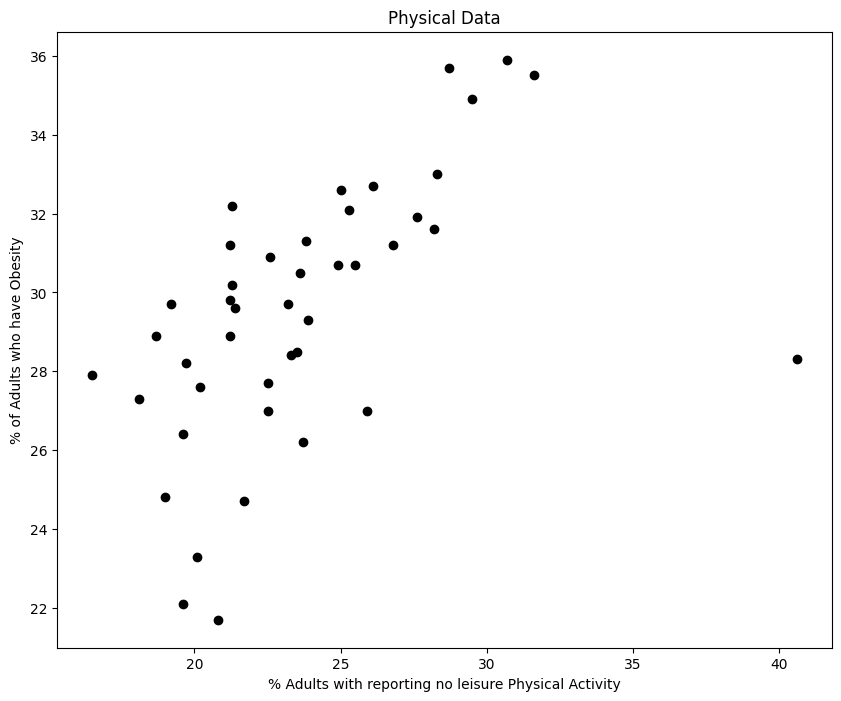

In [16]:
with rc_context({'figure.facecolor':'white'}):
    plt.figure(figsize=(10,8))
    plt.scatter(x_train, y_train, color='black')
    plt.xlabel('% Adults with reporting no leisure Physical Activity')
    plt.ylabel('% of Adults who have Obesity')
    plt.title('Physical Data')
    

# Model Building

In [13]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)

In [14]:
print(f'Train Accuracy {round(lm.score(x_train, y_train)* 100,2)}%')
print(f'Test Accuracy {round(lm.score(x_test, y_test)* 100,2)}%')

Train Accuracy 29.76%
Test Accuracy 44.09%


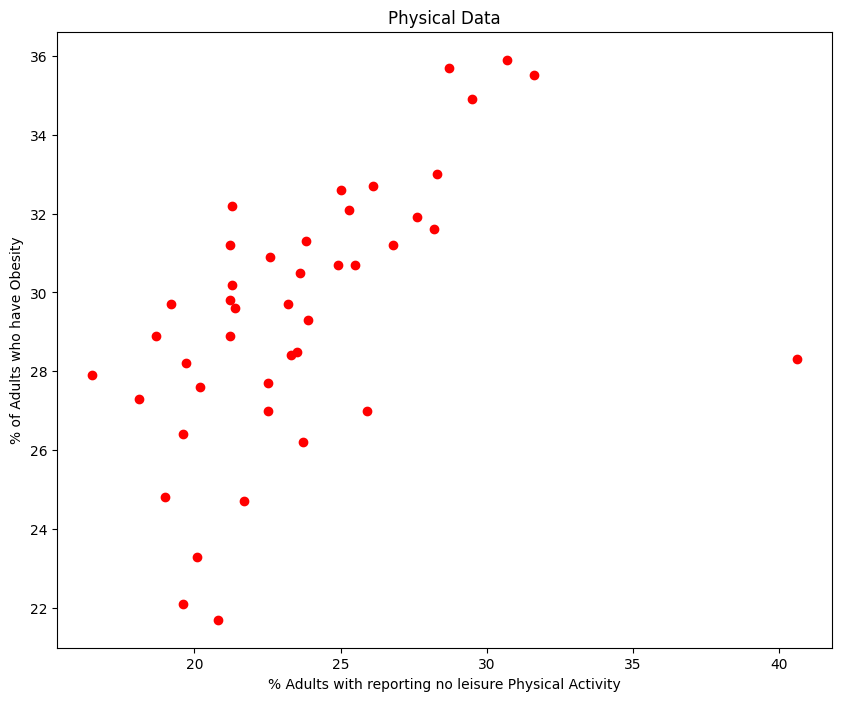

In [17]:
with rc_context({'figure.facecolor':'white'}):
    plt.figure(figsize=(10,8))    
    plt.scatter(x_train, y_train, color='red')
    plt.xlabel('% Adults with reporting no leisure Physical Activity')
    plt.ylabel('% of Adults who have Obesity')
    plt.title('Physical Data')